In [1]:
import numpy as np
import math
import io
import pandas as pd
import seaborn as snb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from scipy.io import loadmat
from sklearn.datasets import load_boston

In [2]:
def normalization(x,y):
    x = (x - x.mean()) / x.std()   
    y= (y - y.mean()) / y.std()
    return x,y

In [3]:
def testmodel(X_test,y_test,beta):
    X=np.ones((X_test.shape[0],X_test.shape[1]+1),dtype=float)
    tmp=X_test.shape[1]+1
    X[:,1:tmp]=X_test[:,:]
    h=np.dot(X,beta)
    
    mae=metrics.median_absolute_error(y_true=y_test,y_pred=h)
#     print("Mean absolute error =",mae)
    
    mse=metrics.mean_squared_error(y_true=y_test,y_pred=h)
#     print("Meansquared Error =",mse)

In [4]:
def predict(X_test,beta):
    X=np.ones((X_test.shape[0],X_test.shape[1]+1),dtype=float)
    tmp=X_test.shape[1]+1
    X[:,1:tmp]=X_test[:,:]
    h=np.dot(X,beta)
    return h

In [5]:
def plotstream(Beta,x,y):
    h=(x[:,2]*Beta[3])+Beta[0]
    plt.scatter(x[:,2], y)
    plt.plot(h,x[:,2])
    plt.draw()
    plt.pause(0.1) 

In [6]:
def streamdataX(X,i,prv,datasize,windowsize) :
    while i<=datasize :
        yield X[prv:i,:]
        prv=i
        i+=windowsize

In [7]:
def streamdatay(y,i,prv,datasize,windowsize) :
    while i<=datasize :
        yield y[prv:i]
        prv=i
        i+=windowsize 

In [8]:
x,y=load_boston(return_X_y=True)
print(x.shape)

(506, 13)


In [9]:
def trainModelIMSR(x,y,M,V) :
    p=np.dot(x.T,x)
    p=np.add(p,M)

    try :
        p_inv=np.linalg.inv(p)          #inverse of X^T*X 
    except np.linalg.LinAlgError:
        p_inv=np.linalg.pinv(p)

    xt_y=np.dot(x.T,y)
    xt_y=np.add(xt_y,V)

    Beta=np.dot(p_inv,xt_y) 

    return Beta,p,xt_y

![picture](https://drive.google.com/uc?id=1rNYtheYwup-eKrYHT7QqXmNGB29F5ZvS)

In [10]:
def IMSR(windowsize):
    p=windowsize
    M=np.zeros((p,p),dtype=float) 
    V=np.zeros(p,dtype=float)

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
    X_train = (X_train - X_train.mean()) / X_train.std()   
    y_train = (y_train - y_train.mean()) / y_train.std()

    datasize = X_train.shape[0]
#     print('datasize = ',datasize)
#     print('windowsize = ',windowsize)
#     print('required iteration = ',datasize//windowsize)
    
    #plt.ion()
    for i in range(0,datasize//windowsize):
#         print("----------Iteration---------",i+1)
        if i==0 :
            data_x=streamdataX(X_train,windowsize,0,datasize,windowsize) 
            data_y=streamdatay(y_train,windowsize,0,datasize,windowsize)

        X_s=next(data_x) 
        y_s=next(data_y)

        X=np.ones((X_s.shape[0],X_s.shape[1]+1),dtype=float)
        tmp=X_s.shape[1]+1
        X[:,1:tmp]=X_s[:,:]

        Beta,M,V=trainModelIMSR(X,y_s,M,V)
        #plotstream(Beta,x,y)
        X_test = (X_test - X_test.mean()) / X_test.std()       #normalise testing set
        y_test = (y_test - y_test.mean()) / y_test.std()
        testmodel(X_test,y_test,Beta)

    data_x.close()
    data_y.close()

In [11]:
IMSR(14)  # IMSR(windowsize)

In [12]:
def trainModelASR(x,y):
    p=np.dot(x.T,x)

    try :
        p_inv=np.linalg.inv(p)          #inverse of X^T*X 
    except np.linalg.LinAlgError:
        p_inv=np.linalg.pinv(p)

    xt_y=np.dot(x.T,y)
    Beta=np.dot(p_inv,xt_y)
    return Beta

In [13]:
x,y=load_boston(return_X_y=True)
print(x.shape)

(506, 13)


In [14]:
def testmodel2(X_test,y_test,beta):
    X=np.ones((X_test.shape[0],X_test.shape[1]+1),dtype=float)
    tmp=X_test.shape[1]+1
    X[:,1:tmp]=X_test[:,:]
    h=np.dot(X,beta)
    mae=metrics.median_absolute_error(y_true=y_test,y_pred=h)
    mse=metrics.mean_squared_error(y_true=y_test,y_pred=h)
    return mse

![picture](https://drive.google.com/uc?id=1RfV_zhbIENUbiXo0uFKmEllxAtrgzdD0)

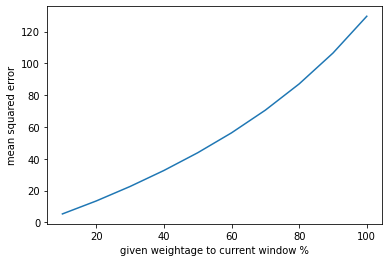

In [15]:
p=14
weightArray = []
errorArray = []
windowsize=14
datasize=404
#plt.ion()
flag = 0
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
X_train = (X_train - X_train.mean()) / X_train.std()   
y_train = (y_train - y_train.mean()) / y_train.std()
for alfa in np.arange(0.0,1.0,0.1):
    averageError = 0
    count = 0
    betaFinal=np.zeros((p),dtype=float)
    
    for i in range(0,10):
        if(flag == 1):
            print("----------Iteration---------",i+1)
        if i==0 :
            data_x=streamdataX(X_train,windowsize,0,datasize,windowsize) 
            data_y=streamdatay(y_train,windowsize,0,datasize,windowsize)
        # fatch next data
        X_s=next(data_x) 
        y_s=next(data_y)

        X=np.ones((X_s.shape[0],X_s.shape[1]+1),dtype=float)
        tmp=X_s.shape[1]+1
        X[:,1:tmp]=X_s[:,:]

        betaTemp=trainModelASR(X,y_s)
        betaFinal = betaTemp*(1-alfa) + alfa*betaFinal

        #plotstream(Beta,x,y)
        X_test = (X_test - X_test.mean()) / X_test.std()       #normalise testing set
        y_test = (y_test - y_test.mean()) / y_test.std()
        predictions = predict(X_test,betaFinal)
        averageError += metrics.mean_squared_error(y_true=y_test,y_pred=predictions)
        count+=1

#         print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
#         print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))
    
    flag = 0
    weightArray.append((1-alfa)*100)
    errorArray.append(averageError/count)

data_x.close()
data_y.close()  

plt.xlabel('given weightage to current window %')
plt.ylabel('mean squared error')
plt.plot(weightArray,errorArray)
plt.show()